In [4]:
# Import necessary libraries
import pandas as pd

# Load the Excel file
data = pd.read_excel("employee_attrition_dataset.xlsx")

# Display the first few rows
print(data.head())

   Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   56        No      Travel_Rarely                   Sales                29   
1   46        No         Non-Travel         Human Resources                17   
2   32        No  Travel_Frequently         Human Resources                28   
3   25       Yes         Non-Travel  Research & Development                24   
4   38       Yes  Travel_Frequently                   Sales                20   

   Education  Gender                JobRole  MonthlyIncome  \
0          2  Female  Laboratory Technician          10720   
1          1    Male        Human Resources          12172   
2          1  Female  Laboratory Technician          16457   
3          5  Female        Human Resources           4939   
4          3    Male        Sales Executive          16345   

   NumCompaniesWorked OverTime  TotalWorkingYears  YearsAtCompany  \
0                   6       No                 32               9   
1 

In [7]:
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   1500 non-null   int64 
 1   Attrition             1500 non-null   object
 2   BusinessTravel        1500 non-null   object
 3   Department            1500 non-null   object
 4   DistanceFromHome      1500 non-null   int64 
 5   Education             1500 non-null   int64 
 6   Gender                1500 non-null   object
 7   JobRole               1500 non-null   object
 8   MonthlyIncome         1500 non-null   int64 
 9   NumCompaniesWorked    1500 non-null   int64 
 10  OverTime              1500 non-null   object
 11  TotalWorkingYears     1500 non-null   int64 
 12  YearsAtCompany        1500 non-null   int64 
 13  YearsInCurrentRole    1500 non-null   int64 
 14  YearsWithCurrManager  1500 non-null   int64 
dtypes: int64(9), object(6)
memory usage: 1

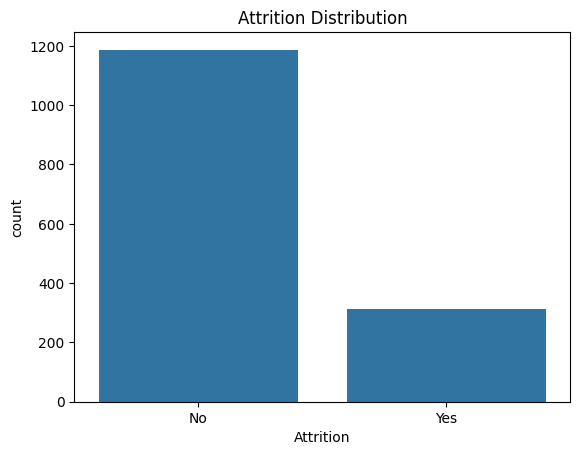

In [8]:
sns.countplot(x='Attrition', data=data)
plt.title('Attrition Distribution')
plt.show()

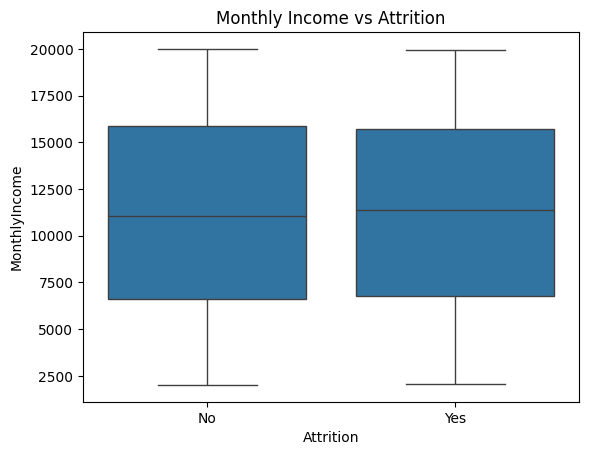

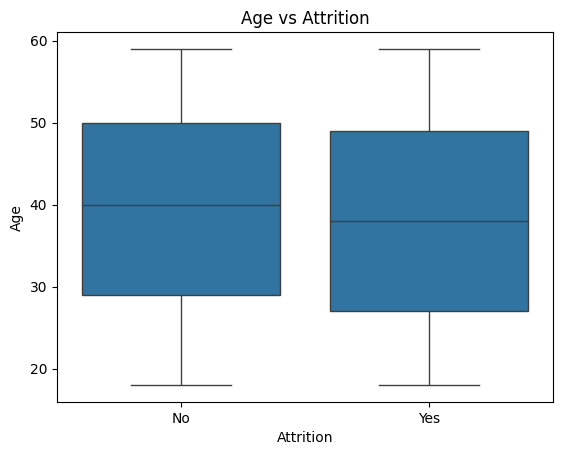

In [9]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data)
plt.title('Monthly Income vs Attrition')
plt.show()

sns.boxplot(x='Attrition', y='Age', data=data)
plt.title('Age vs Attrition')
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Convert 'Attrition' to binary
data['Attrition'] = le.fit_transform(data['Attrition'])

# Encode other categorical features
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numerical_columns = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [13]:
X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.77
Confusion Matrix:
 [[231   1]
 [ 68   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       232
           1       0.00      0.00      0.00        68

    accuracy                           0.77       300
   macro avg       0.39      0.50      0.44       300
weighted avg       0.60      0.77      0.67       300



In [17]:
feature_importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

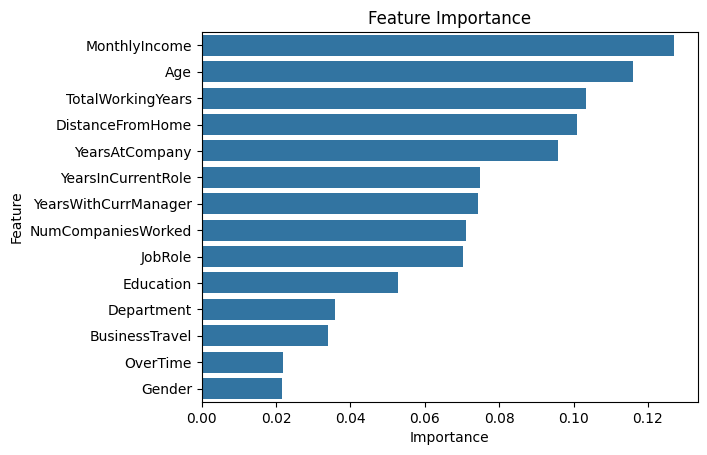

In [18]:
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()